In [1]:
import requests
from utils.weather_utils import ns
import datetime
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt

In [50]:
start_time = datetime.datetime.now()
end_time = start_time - datetime.timedelta(hours=12)
start_time = start_time.strftime("%Y-%m-%dT%H:%M:%SZ")
end_time = end_time.strftime("%Y-%m-%dT%H:%M:%SZ")

# Get the data from FMI in xml format
url = (
    "http://opendata.fmi.fi/wfs/fin?service=WFS&version=2.0.0"
    "&request=GetFeature"
    # "&storedquery_id=fmi::forecast::silam::airquality::surface::point::multipointcoverage"
    "&storedquery_id=fmi::forecast::enfuser::airquality::helsinki-metropolitan::grid"
    "&parameters=AQIndex"
    "bbox=24.58,60.1321,25.1998,60.368"
    # f"&starttime={start_time}&endtime={end_time}&"
    # f"&starttime={start_time}&endtime={end_time}&"
    )

resp = requests.get(url)
resp.raise_for_status()

with open("weather_data/air_quality_test.xml", "w") as f:
    f.writelines(resp.text)
# The fromstring method returns the root
root = ET.fromstring(resp.content.decode("utf-8"))

In [51]:
start = "2023-08-14T06:00:00Z"
end = "2023-08-15T21:00:00Z"

# url = root.find("./wfs:member/omso:GridSeriesObservation/om:result/gmlcov:RectifiedGridCoverage/gml:rangeSet/gml:File/gml:fileReference", ns).text
begin_position = root.find("./wfs:member/omso:GridSeriesObservation/om:phenomenonTime/gml:TimePeriod/gml:beginPosition", ns).text
end_position = root.find("./wfs:member/omso:GridSeriesObservation/om:phenomenonTime/gml:TimePeriod/gml:endPosition", ns).text
# url = "https://opendata.fmi.fi/download?producer=enfuser_helsinki_metropolitan&param=AQIndex&bbox=24.58,60.1321,25.1998,60.368&levels=0&origintime=2023-07-20T10:00:00Z&starttime=2023-07-22T12:00:00Z&endtime=2023-07-22T13:00:00Z&format=netcdf&projection=EPSG:4326"
url = f"https://opendata.fmi.fi/download?producer=enfuser_helsinki_metropolitan&param=AQIndex&bbox=24.58,60.1321,25.1998,60.368&levels=0&origintime={begin_position}&starttime={begin_position}&endtime={end_position}&format=netcdf&projection=EPSG:4326"
print(url)
# url = "https://opendata.fmi.fi/download?producer=enfuser_helsinki_metropolitan&param=AQIndex,NO2Concentration,O3Concentration,PM10Concentration,PM25Concentration,LungDepositedSurfaceArea,BlackCarbonConcentration&bbox=24.58,60.1321,25.1998,60.368&levels=0&origintime=2023-07-20T10:00:00Z&starttime=2023-07-20T10:00:00Z&endtime=2023-07-22T01:00:00Z&format=netcdf&projection=EPSG:4326"
tt = requests.get(url)

print(tt)
# file_tag = root.find(".//gml:File.", ns,)
# print(file_tag)
# file_tag.find("gml:fileReference", ns).text

# print(temp.text)

# Get the temperature value
# temperature = root.find(
#     ".//wml2:MeasurementTimeseries[@gml:id='mts-1-1-temperature']//wml2:value",
#     ns,
# )
# temperature = float(temperature.text)

# http://opendata.fmi.fi/download?producer=enfuser_helsinki_metropolitan&param=&bbox=24.58,60.1321,25.1998,60.368&levels=0&origintime=2023-08-14T18:00:00Z&starttime=2023-08-14T18:00:00Z&endtime=2023-08-16T09:00:00Z&format=netcdf&projection=EPSG:4326

https://opendata.fmi.fi/download?producer=enfuser_helsinki_metropolitan&param=AQIndex&bbox=24.58,60.1321,25.1998,60.368&levels=0&origintime=2023-08-14T12:00:00Z&starttime=2023-08-14T12:00:00Z&endtime=2023-08-16T03:00:00Z&format=netcdf&projection=EPSG:4326
<Response [200]>


In [53]:
with open("data/aqi_download_test.nc", "wb") as f:
    f.write(tt.content)

In [78]:
from netCDF4 import Dataset
import netCDF4

# nc = Dataset(
#     "./data/enfuser_helsinki_metropolitan_20230726T100000_20230726T120000_20230728T130000_latlon.nc"
# )
nc = Dataset(
    # "./data/enfuser_helsinki_test.nc"
    "./data/aqi_download_test.nc"
)

print(nc.data_model)
print(nc.groups)
print(nc.dimensions)
for var, tt in nc.variables.items():
    print(var, tt)
# print(nc.variables)

lat = nc.variables["lat"][:]
lon = nc.variables["lon"][:]
time = nc.variables["time"][:]
aqi = nc.variables["index_of_airquality_194"][:]

print(aqi.shape)
print(nc.variables["index_of_airquality_194"])

# print(nc.variables["index_of_airquality_194"][1,0,0])

nc.close()

NETCDF3_64BIT_OFFSET
{}
{'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 40, 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 2018, 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 2631}
time <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: time
    calendar: gregorian
    units: hours since 2023-08-14 12:00:00
unlimited dimensions: 
current shape = (40,)
filling on, default _FillValue of -2147483647 used
crs <class 'netCDF4._netCDF4.Variable'>
int16 crs()
    grid_mapping_name: latitude_longitude
    earth_radius: 6371220.0
    crs_wkt: PROJCS["unknown",GEOGCS["FMI_Sphere",DATUM["FMI_2007",SPHEROID["FMI_Sphere",6371220,0]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Equirectangular"],PARAMETER["standard_parallel_1",0],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1, AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NOR

In [79]:
import cftime
import datetime

nc = Dataset(
    # "./data/enfuser_helsinki_test.nc"
    "./data/aqi_download_test.nc"
)
time_var = nc.variables["time"]
print(time_var.units)
dtime = netCDF4.num2date(time_var[:],time_var.units, time_var.calendar)
# print(dtime)
first_dtime = dtime[31]
now = datetime.datetime.utcnow()
print(first_dtime)
print(now)

print(first_dtime < now)
print(first_dtime - now)
print((first_dtime - now).total_seconds()/60)
print(first_dtime - now > datetime.timedelta(hours=2))

nc.close()

hours since 2023-08-14 12:00:00
2023-08-15 19:00:00
2023-08-15 15:25:41.472165
False
3:34:18.527835
214.30879725000003
True


In [47]:
print(dtime)

[cftime.DatetimeGregorian(2023, 8, 14, 8, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2023, 8, 14, 9, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2023, 8, 14, 10, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2023, 8, 14, 11, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2023, 8, 14, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2023, 8, 14, 13, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2023, 8, 14, 14, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2023, 8, 14, 15, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2023, 8, 14, 16, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2023, 8, 14, 17, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2023, 8, 14, 18, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2023, 8, 14, 19, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2023, 8, 14, 20, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2023, 8, 14, 21, 0, 0, 0, h

In [30]:
# Set AQI to very high inside some bounding box for testing

# BB
lon0 = 24.950
lat0 = 60.183
lon1 = 24.978
lat1 = 60.195

# lon0 = 24.9065
# lat0 = 60.1737
# lon1 = 24.9332
# lat1 = 60.1862


nc = Dataset(
    "./data/enfuser_helsinki_test.nc", "r+"
)


lat = nc.variables["lat"][:]
lon = nc.variables["lon"][:]

lat_ind = (lat >= lat0) & (lat <= lat1)
lon_ind = (lon >= lon0) & (lon <= lon1)

print(nc.variables["index_of_airquality_194"][:, lat_ind, lon_ind].shape)

nc.variables["index_of_airquality_194"][0, lat_ind, lon_ind] = 100

# time = nc.variables["time"][:]
aqi = nc.variables["index_of_airquality_194"][:]

# print(aqi.shape)
# print(nc.variables["index_of_airquality_194"])

# print(nc.variables["index_of_airquality_194"][1,0,0])

nc.close()

(38, 102, 118)


In [15]:
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (np.abs(dd_array - dd)).argmin()
   return geo_idx

print(geo_idx(60.2, lat))

581


In [21]:
for i in range(aqi.shape[0]):
    
    print(f"i: {i}, time: {time[i]}, aqi: {aqi[i,:,:].max().round(2)}")

i: 0, time: 0, aqi: 2.4000000953674316
i: 1, time: 1, aqi: 2.0999999046325684
i: 2, time: 2, aqi: 2.200000047683716
i: 3, time: 3, aqi: 2.200000047683716
i: 4, time: 4, aqi: 2.0999999046325684
i: 5, time: 5, aqi: 2.200000047683716
i: 6, time: 6, aqi: 2.200000047683716
i: 7, time: 7, aqi: 2.0999999046325684
i: 8, time: 8, aqi: 2.200000047683716
i: 9, time: 9, aqi: 2.299999952316284
i: 10, time: 10, aqi: 2.200000047683716
i: 11, time: 11, aqi: 2.0
i: 12, time: 12, aqi: 2.0
i: 13, time: 13, aqi: 2.0
i: 14, time: 14, aqi: 2.0
i: 15, time: 15, aqi: 2.200000047683716
i: 16, time: 16, aqi: 2.4000000953674316
i: 17, time: 17, aqi: 2.5
i: 18, time: 18, aqi: 2.5
i: 19, time: 19, aqi: 2.5999999046325684
i: 20, time: 20, aqi: 2.700000047683716
i: 21, time: 21, aqi: 3.0
i: 22, time: 22, aqi: 3.299999952316284
i: 23, time: 23, aqi: 3.0999999046325684
i: 24, time: 24, aqi: 3.200000047683716
i: 25, time: 25, aqi: 2.799999952316284
i: 26, time: 26, aqi: 2.700000047683716
i: 27, time: 27, aqi: 2.7000000

In [13]:
from geojson import Polygon, Feature, FeatureCollection

# Get all the cell grids into a JSON

# Not how it suppose to be done, but a quick hack to test the capabilities of Graphhopper

lat_grid_size = np.diff(lat).mean()
lon_grid_size = np.diff(lon).mean()

delta_lat = lat_grid_size / 2
delta_lon = lon_grid_size / 2

# Original grid size 5309358
max_cells = 5309358//100000
print(max_cells)

features = []
feat_id = 0
for x in lon:
    for y in lat:
        if feat_id > max_cells:
            break
        poly = Polygon(
            [
                [
                    (x - delta_lon, y - delta_lat),
                    (x - delta_lon, y + delta_lat),
                    (x + delta_lon, y + delta_lat),
                    (x + delta_lon, y - delta_lat),
                    (x - delta_lon, y - delta_lat),
                ]
            ]
        )
        features.append(Feature(geometry=poly, id=feat_id))
        feat_id = feat_id + 1


feature_collection = FeatureCollection(features=features)

53


In [14]:
len(feature_collection["features"])

54

In [15]:
import geojson

with open("areas.geojson", "w") as f:
    geojson.dump(feature_collection, f)


In [9]:
lon[]

24.58

In [16]:
priorities = []

feat_id = 0
for x in range(aqi.shape[2]):  # lon
    for y in range(aqi.shape[1]):  # lat
        if feat_id > max_cells:
            break
        aqi_val = aqi[0, y, x]
        priorities.append(
            {
                "if": f"in_{feat_id}",
                "multiply_by": f"{1/aqi_val}",
            }
        )
        feat_id = feat_id + 1

aqi_model = {"priority": priorities}

import json

with open("aqi_model.json", "w") as f:
    json.dump(aqi_model, f)

In [47]:
print("Latitude:")
print(lat[0], " ", lat[-1])
print(f"Mean resolution: {(lat[-1]-lat[0])/len(lat)}")
print(f"Resolution: {np.unique(np.diff(lat))}")
print("------------------------------------")
print("Longitude:")
print(lon[0], " ", lon[-1])
print(f"Mean resolution: {(lon[-1]-lon[0])/len(lon)}")
print(f"Resolution: {np.unique(np.diff(lon))}")
print("------------------------------------")

# fig, axes = plt.subplots(1,2)
# ax = axes[0]
# ax.plot(np.diff(lat), ".")
# ax.set_title("Latitude")

# ax = axes[1]
# ax.plot(np.diff(lon), ".")
# ax.set_title("Longitude")



Latitude:
60.1321   60.368
Mean resolution: 0.00011689835426474232
Resolution: [0.00011444 0.00011826]
------------------------------------
Longitude:
24.58   25.1998
Mean resolution: 0.00023557604242757625
Resolution: [0.0002346  0.00023651]
------------------------------------


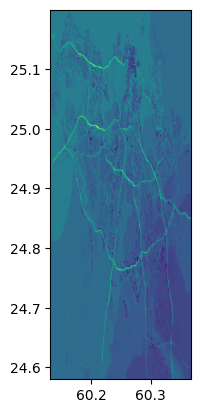

In [20]:
lons, lats = np.meshgrid(lon, lat)

fig, ax = plt.subplots()

ax.imshow(np.transpose(aqi[0, :, :], [0,1]), extent=[lat.min(), lat.max(), lon.min(), lon.max()])
# ax.imshow(aqi[1, :, :], extent=[lon.min(), lon.max(), lat.min(), lat.max()])